In [1]:
import sys

from qetu_sim import *

import numpy as np
import scipy.linalg
import itertools
import matplotlib.pyplot as plt

from qiskit import *
from qiskit.transpiler import Layout
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import Permutation
from qiskit.visualization import *
from qiskit_aer import AerSimulator

In [2]:
u = 1
t = 1
delta_t = 1
n = 1
num_sites = 4

In [3]:
ref_H_matrix = ref_fh_hamiltonian(u=u, t=t)
ref_U_matrix = ref_fh_op(u=1, t=1, delta_t=1)

c:\Python311\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
c:\Python311\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


In [4]:
u = 1
t = 1
delta_t = 1
degree_list = range(2,31,2)
trotter_steps_list = range(1,2)
overlap_list = []
overlap_noise_list = []

for degree in degree_list:
    E_min, E_mu_m, E_mu_p, E_max = calculate_qsp_params(u, t)
    qsp = QSPPhase()
    phi_seq_su2 = qsp.cvx_qsp_heaviside(
        degree, 
        E_min,
        E_mu_m, 
        E_mu_p, 
        E_max
    )
    for trotter_steps in trotter_steps_list:
        print("Degree: " + str(degree) + "\t Trotter steps: " + str(trotter_steps))
        print("-------------------------")
        phi_vec = convert_Zrot_to_Xrot(phi_seq_su2)
        QETU_circ = construct_QETU_circ(u, t, trotter_steps, phi_vec)
        QETU_circ_WMI = transpile_QETU_to_WMI(QETU_circ)
        initial_state = Statevector.from_label("0-+0++++0")
        final_state = qetu_sim(QETU_circ_WMI, initial_state)
        ground_state_energy, ground_state_vector = calculate_reference_ground_state(u, t, False)
        success_probability = scipy.linalg.norm(final_state)**2
        overlap = abs(np.vdot(final_state / scipy.linalg.norm(final_state), ground_state_vector))**2
        print("overlap: " + str(overlap))
        noise_model = wmi_grid_noise_model(depol_only=True)
        initial_state_noise = Statevector.from_label("0-+0++++0")
        final_state_noise = qetu_sim_noise(QETU_circ_WMI, initial_state_noise, noise_model)
        overlap_noise = abs(np.vdot(final_state_noise / scipy.linalg.norm(final_state_noise), ground_state_vector))**2
        print("overlap noise: " + str(overlap_noise))
        overlap_list.append(overlap)
        overlap_noise_list.append(overlap_noise)


starting matlab engine..
Degree: 2	 Trotter steps: 1
-------------------------
overlap: 0.02999102998113103
overlap noise: 0.0016631336007637458

starting matlab engine..

stopping matlab engine..
Degree: 4	 Trotter steps: 1
-------------------------
overlap: 0.034951289482428594
overlap noise: 0.0009022824866188726

starting matlab engine..

stopping matlab engine..
Degree: 6	 Trotter steps: 1
-------------------------
overlap: 0.07966886141039768
overlap noise: 0.00037061069210988704

starting matlab engine..

stopping matlab engine..
Degree: 8	 Trotter steps: 1
-------------------------
overlap: 0.16578542723998194
overlap noise: 0.017197549886470626

starting matlab engine..

stopping matlab engine..
Degree: 10	 Trotter steps: 1
-------------------------
overlap: 0.4161732939146569
overlap noise: 0.00810328336478701

starting matlab engine..

stopping matlab engine..
Degree: 12	 Trotter steps: 1
-------------------------
overlap: 0.5331749356879582


Text(0, 0.5, 'overlap')

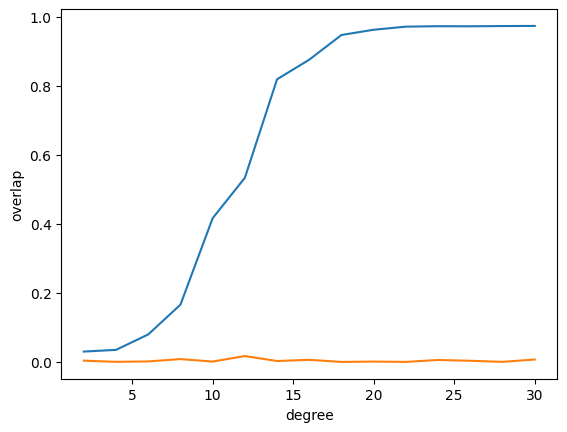

In [ ]:
plt.plot(degree_list, overlap_list)
plt.plot(degree_list, overlap_noise_list)
plt.xlabel("degree")
plt.ylabel("overlap")